#Import required Libraries:
### Dataset link: https://finance.yahoo.com/quote/TSLA/history?p=TSLA

### This dataset is of "Tesla Stock" from 14/09/2020 to 14/09/2021.

### This project is about "Tesla Stock price prediction for next 30days using Facebook Prophet"

In [20]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [21]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

#Import the Dataset & Exploring it.

In [22]:
#To read csv
df = pd.read_csv('TSLA.csv')

In [23]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-14,380.950012,420.000000,373.299988,419.619995,419.619995,83020600
1,2020-09-15,436.559998,461.940002,430.700012,449.760010,449.760010,97298200
2,2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
3,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
4,2020-09-18,447.940002,451.000000,428.799988,442.149994,442.149994,86406800
...,...,...,...,...,...,...,...
247,2021-09-07,740.000000,760.200012,739.260010,752.919983,752.919983,20039800
248,2021-09-08,761.580017,764.450012,740.770020,753.869995,753.869995,18793000
249,2021-09-09,753.409973,762.099976,751.630005,754.859985,754.859985,14077700
250,2021-09-10,759.599976,762.609985,734.520020,736.270020,736.270020,15114300


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [25]:
#statistical information
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,636.852064,649.797500,622.482064,637.030713,637.030713,3.484407e+07
std,126.394413,127.549759,124.477723,126.072324,126.072324,2.129243e+07
min,363.799988,399.500000,351.299988,380.359985,380.359985,9.800600e+06
25%,588.367508,599.022476,570.917511,585.510010,585.510010,2.168980e+07
50%,661.565002,669.200012,644.644989,657.285004,657.285004,2.992560e+07
75%,711.212494,720.990005,699.802521,710.222488,710.222488,4.111025e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


#Data visualization

In [26]:
#Analyzing the price of Tesla
px.area(df, x='Date', y='Close')

In [27]:
#By using line graph
px.line(df, x= 'Date', y= 'Close')

In [28]:
px.area(df, x='Date', y='Volume')

In [29]:
px.box(df, y="Close")

#Data Preparation

In [30]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-14,380.950012,420.000000,373.299988,419.619995,419.619995,83020600
1,2020-09-15,436.559998,461.940002,430.700012,449.760010,449.760010,97298200
2,2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
3,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
4,2020-09-18,447.940002,451.000000,428.799988,442.149994,442.149994,86406800
...,...,...,...,...,...,...,...
247,2021-09-07,740.000000,760.200012,739.260010,752.919983,752.919983,20039800
248,2021-09-08,761.580017,764.450012,740.770020,753.869995,753.869995,18793000
249,2021-09-09,753.409973,762.099976,751.630005,754.859985,754.859985,14077700
250,2021-09-10,759.599976,762.609985,734.520020,736.270020,736.270020,15114300


In [31]:
columns=['Date','Close']
ndf=pd.DataFrame(df, columns=columns)

In [32]:
ndf

,Date,Close
0,2020-09-14,419.619995
1,2020-09-15,449.760010
2,2020-09-16,441.760010
3,2020-09-17,423.429993
4,2020-09-18,442.149994
...,...,...
247,2021-09-07,752.919983
248,2021-09-08,753.869995
249,2021-09-09,754.859985
250,2021-09-10,736.270020


In [33]:
#create a new dataset using "Date" and "Close" columns.
columns=["Date","Close"]
ndf=pd.DataFrame(df,columns=columns)

In [34]:
#check for ndf
ndf

,Date,Close
0,2020-09-14,419.619995
1,2020-09-15,449.760010
2,2020-09-16,441.760010
3,2020-09-17,423.429993
4,2020-09-18,442.149994
...,...,...
247,2021-09-07,752.919983
248,2021-09-08,753.869995
249,2021-09-09,754.859985
250,2021-09-10,736.270020


#Making the prediction using FaceBook prophet

### The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [35]:
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})

In [36]:
prophet_df

,ds,y
0,2020-09-14,419.619995
1,2020-09-15,449.760010
2,2020-09-16,441.760010
3,2020-09-17,423.429993
4,2020-09-18,442.149994
...,...,...
247,2021-09-07,752.919983
248,2021-09-08,753.869995
249,2021-09-09,754.859985
250,2021-09-10,736.270020


In [38]:
m=Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [39]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [40]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-14,380.555456,308.984421,429.304789,380.555456,380.555456,-9.565968,-9.565968,-9.565968,-9.565968,-9.565968,-9.565968,0.0,0.0,0.0,370.989488
1,2020-09-15,382.450500,318.076608,437.150702,382.450500,382.450500,-5.102658,-5.102658,-5.102658,-5.102658,-5.102658,-5.102658,0.0,0.0,0.0,377.347842
2,2020-09-16,384.345544,319.502193,436.860385,384.345544,384.345544,-7.684686,-7.684686,-7.684686,-7.684686,-7.684686,-7.684686,0.0,0.0,0.0,376.660857
3,2020-09-17,386.240587,321.705333,439.821436,386.240587,386.240587,-7.757086,-7.757086,-7.757086,-7.757086,-7.757086,-7.757086,0.0,0.0,0.0,378.483501
4,2020-09-18,388.135631,321.524663,435.772830,388.135631,388.135631,-7.199061,-7.199061,-7.199061,-7.199061,-7.199061,-7.199061,0.0,0.0,0.0,380.936570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2021-10-09,762.932702,721.567200,843.962499,751.860951,775.663191,18.654730,18.654730,18.654730,18.654730,18.654730,18.654730,0.0,0.0,0.0,781.587431
278,2021-10-10,763.991913,718.753474,844.307084,752.138624,777.663338,18.654730,18.654730,18.654730,18.654730,18.654730,18.654730,0.0,0.0,0.0,782.646643
279,2021-10-11,765.051124,695.292917,813.906030,752.407295,779.293227,-9.565968,-9.565968,-9.565968,-9.565968,-9.565968,-9.565968,0.0,0.0,0.0,755.485156
280,2021-10-12,766.110335,701.716675,819.739469,752.582293,781.036816,-5.102658,-5.102658,-5.102658,-5.102658,-5.102658,-5.102658,0.0,0.0,0.0,761.007677


In [41]:
#Visualize the forecast
px.line(forecast,x='ds',y='yhat')

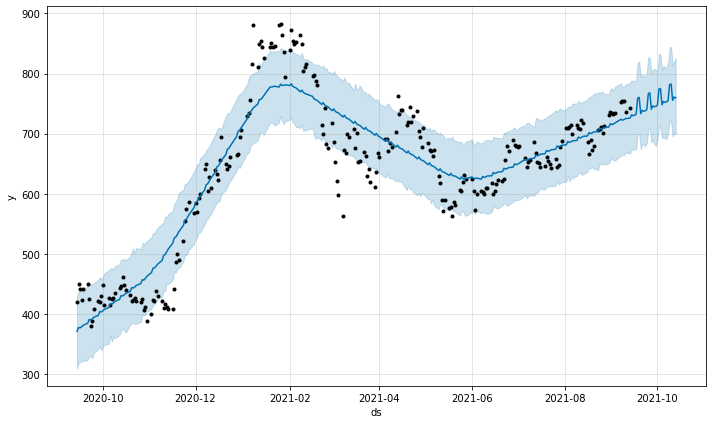

In [42]:
figure=m.plot(forecast, xlabel='ds',ylabel='y')

### Here the black dots are actual stock price. 

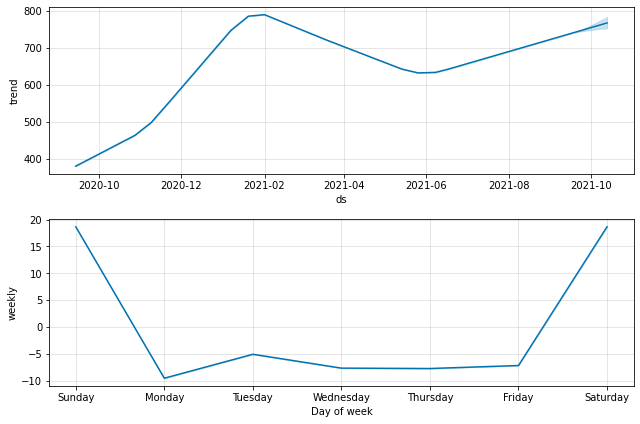

In [43]:
figure2=m.plot_components(forecast)

## Downloading the forecast

In [44]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### We can visualize this result by using "Google Sheet" 
### Link of the csv file: https://docs.google.com/spreadsheets/d/1VZPS-9cDK5hlXR7G5j76MYZNcnUKDo1OCRnJ7AT2nzo/edit?usp=sharing


# Inference from the above Analysis and Forecast: 
# We can say that the stock price of the "Tesla Stock" in next 30 days will not increase exponentially.